In [1]:
#Student Success Prediction and the Trade-Off between Big Data and Data Minimization

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
courses=pd.read_csv('courses.csv')
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [3]:
assessments=pd.read_csv('assessments.csv')
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [4]:
assessments.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [5]:
assessments.dropna(subset='date',inplace=True)
assessments.isnull().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

In [6]:
vle=pd.read_csv('vle.csv')
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [7]:
vle.isnull().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [8]:
vle.dropna(subset='week_from',inplace=True)
vle.dropna(subset='week_to',inplace=True)
vle.isnull().sum()

id_site              0
code_module          0
code_presentation    0
activity_type        0
week_from            0
week_to              0
dtype: int64

In [9]:
reg=pd.read_csv('studentRegistration.csv')
reg

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [10]:
reg.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [11]:
reg.dropna(subset=['date_registration','date_unregistration'], inplace=True)
reg.reset_index(drop=True, inplace=True)
reg

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,30268,-92.0,12.0
1,AAA,2013J,65002,-180.0,96.0
2,AAA,2013J,94961,-170.0,72.0
3,AAA,2013J,106247,5.0,175.0
4,AAA,2013J,129955,-197.0,135.0
...,...,...,...,...,...
10028,GGG,2014J,2338614,-23.0,58.0
10029,GGG,2014J,2342238,-45.0,74.0
10030,GGG,2014J,2357806,-128.0,73.0
10031,GGG,2014J,2608143,-45.0,48.0


In [12]:
stu_ass=pd.read_csv('studentAssessment.csv')
stu_ass

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [13]:
stu_ass.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [14]:
stu_ass.dropna(subset='score',inplace=True)
stu_ass.isnull().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

In [15]:
data=pd.read_csv('studentInfo.csv')
data

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [16]:
data.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [17]:
data.dropna(subset='imd_band',inplace=True)

In [18]:
data.isnull().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

In [19]:
stu_Vle=pd.read_csv('studentVle.csv')
stu_Vle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [20]:
stu_Vle.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [21]:
#spajanje setova s obzirom na 'id_student','code_module','code_presentation'
merged= pd.merge(data, stu_Vle, on=['id_student','code_module','code_presentation'], how='inner')
merged

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_site,date,sum_click
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546669,-5,16
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546662,-5,44
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546652,-5,1
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546668,-5,2
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546652,-5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10053390,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,896961,205,13
10053391,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,896959,205,2
10053392,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,896943,219,1
10053393,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,896961,219,31


In [22]:
merged.isnull().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
id_site                 0
date                    0
sum_click               0
dtype: int64

In [23]:
#Stvaranje samo jedne kategorije - Pass
categories_to_merge = ['Pass', 'Distinction']
new_category = 'Pass'
merged['final_result'].replace(categories_to_merge, new_category, inplace=True)

#Izbacivanje kategorije Withdrawn
merged = merged.drop(merged[merged['final_result'] == 'Withdrawn'].index)
merged

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_site,date,sum_click
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546669,-5,16
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546662,-5,44
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546652,-5,1
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546668,-5,2
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546652,-5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10053390,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Pass,896961,205,13
10053391,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Pass,896959,205,2
10053392,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Pass,896943,219,1
10053393,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Pass,896961,219,31


In [24]:
#Stvaranje novog feature-a u kojem su zbrojeni klikovi za svaku aktivnost za svakog studenta u određenom modulu
#Dobijemo sumu klikova po pojedinačnim datumima za pojedinačne module (za svakog studenta)
merged['daily_activity'] = merged.groupby(['id_student','code_module','code_presentation','date'])['sum_click'].transform('sum')

merged

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_site,date,sum_click,daily_activity
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546669,-5,16,98
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546662,-5,44,98
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546652,-5,1,98
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546668,-5,2,98
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546652,-5,1,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10053390,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Pass,896961,205,13,45
10053391,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Pass,896959,205,2,45
10053392,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Pass,896943,219,1,40
10053393,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Pass,896961,219,31,40


In [25]:
merged= merged.drop_duplicates(subset=['id_student','code_module','code_presentation']).reset_index(drop=True)
merged

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_site,date,sum_click,daily_activity
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546669,-5,16,98
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,546652,-10,4,70
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,546672,-10,1,60
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,546681,-10,5,78
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,546879,-10,7,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21184,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,0,30,Y,Pass,897076,-4,1,7
21185,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,896943,-4,2,2
21186,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Pass,897083,19,1,36
21187,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,897071,-10,1,15


In [26]:
merged.drop('sum_click', axis=1, inplace=True)
merged.drop('num_of_prev_attempts', axis=1, inplace=True)


merged

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,studied_credits,disability,final_result,id_site,date,daily_activity
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,240,N,Pass,546669,-5,98
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,60,N,Pass,546652,-10,70
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,60,N,Pass,546672,-10,60
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,60,N,Pass,546681,-10,78
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,60,N,Pass,546879,-10,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21184,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,30,Y,Pass,897076,-4,7
21185,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,30,N,Fail,896943,-4,2
21186,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,30,N,Pass,897083,19,36
21187,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,30,Y,Pass,897071,-10,15


In [27]:
merged.shape

(21189, 14)

In [28]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21189 entries, 0 to 21188
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   code_module        21189 non-null  object
 1   code_presentation  21189 non-null  object
 2   id_student         21189 non-null  int64 
 3   gender             21189 non-null  object
 4   region             21189 non-null  object
 5   highest_education  21189 non-null  object
 6   imd_band           21189 non-null  object
 7   age_band           21189 non-null  object
 8   studied_credits    21189 non-null  int64 
 9   disability         21189 non-null  object
 10  final_result       21189 non-null  object
 11  id_site            21189 non-null  int64 
 12  date               21189 non-null  int64 
 13  daily_activity     21189 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 2.3+ MB


In [29]:
merged.describe()

,id_student,studied_credits,id_site,date,daily_activity
count,2.118900e+04,21189.000000,21189.000000,21189.000000,21189.000000
mean,7.062522e+05,74.469064,742768.947142,-8.025155,21.998679
std,5.511289e+05,36.810220,124968.737365,13.237793,31.223826
min,6.516000e+03,30.000000,526721.000000,-25.000000,1.000000
25%,5.065330e+05,60.000000,673519.000000,-17.000000,4.000000
50%,5.889250e+05,60.000000,768351.000000,-10.000000,11.000000
75%,6.410850e+05,90.000000,832668.000000,-4.000000,27.000000
max,2.698588e+06,630.000000,936981.000000,238.000000,606.000000


Text(0.5, 0, 'daily_activity')

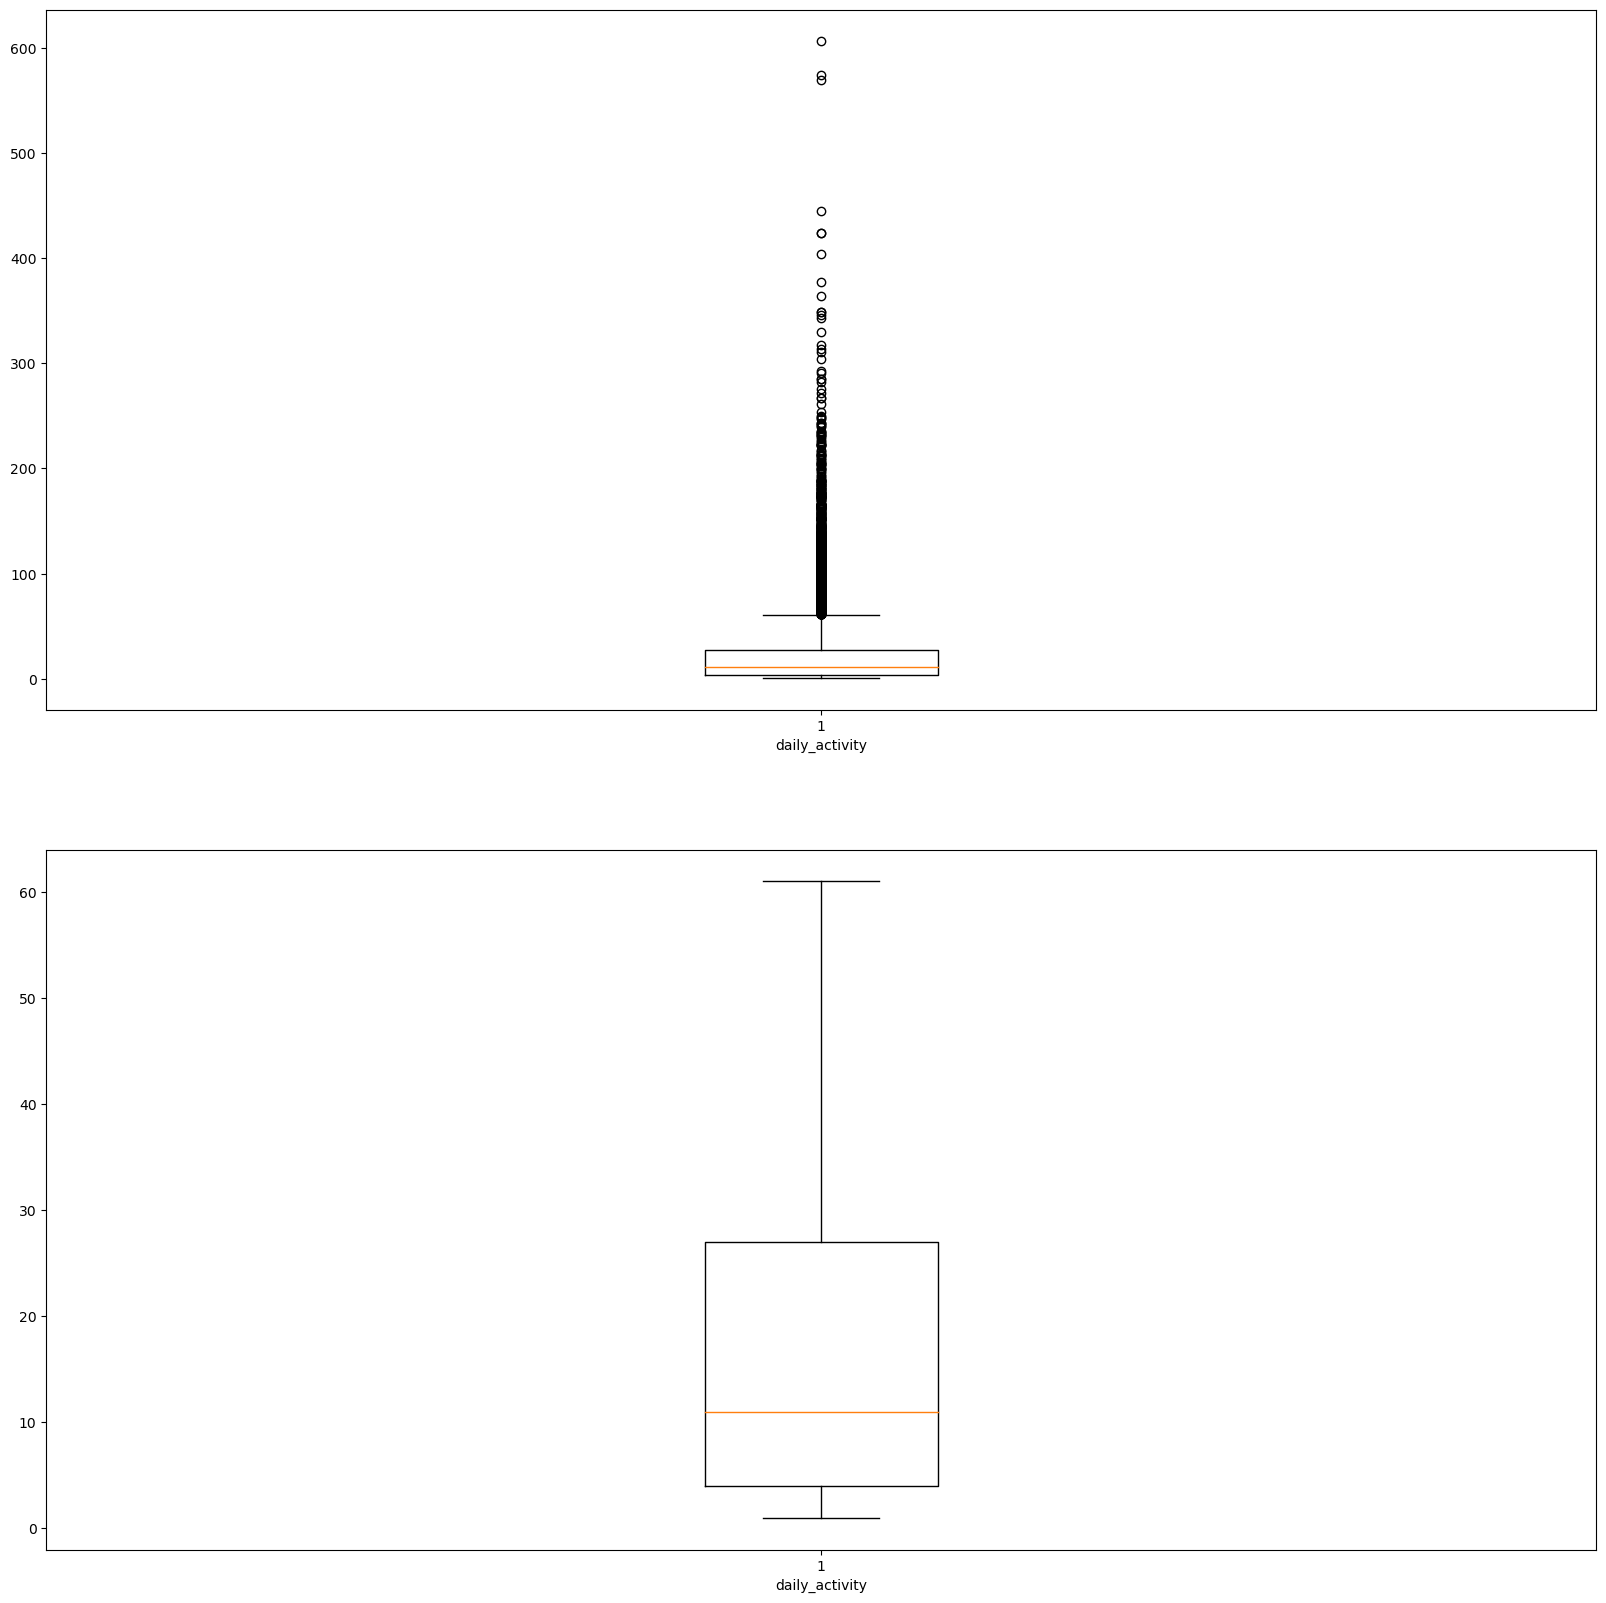

In [30]:
#Visualization of outliers by using box plot(daily_activity)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(20,20))

ax[0].boxplot(merged.daily_activity)
ax[0].set_xlabel('daily_activity')


ax[1].boxplot(merged.daily_activity, showfliers=False)
ax[1].set_xlabel('daily_activity')

#Mislim da nije potrebno ništa raditi s outlierima kod daily_activity jer je taj broj klikova po danu moguć

Text(0.5, 0, 'studied_credits')

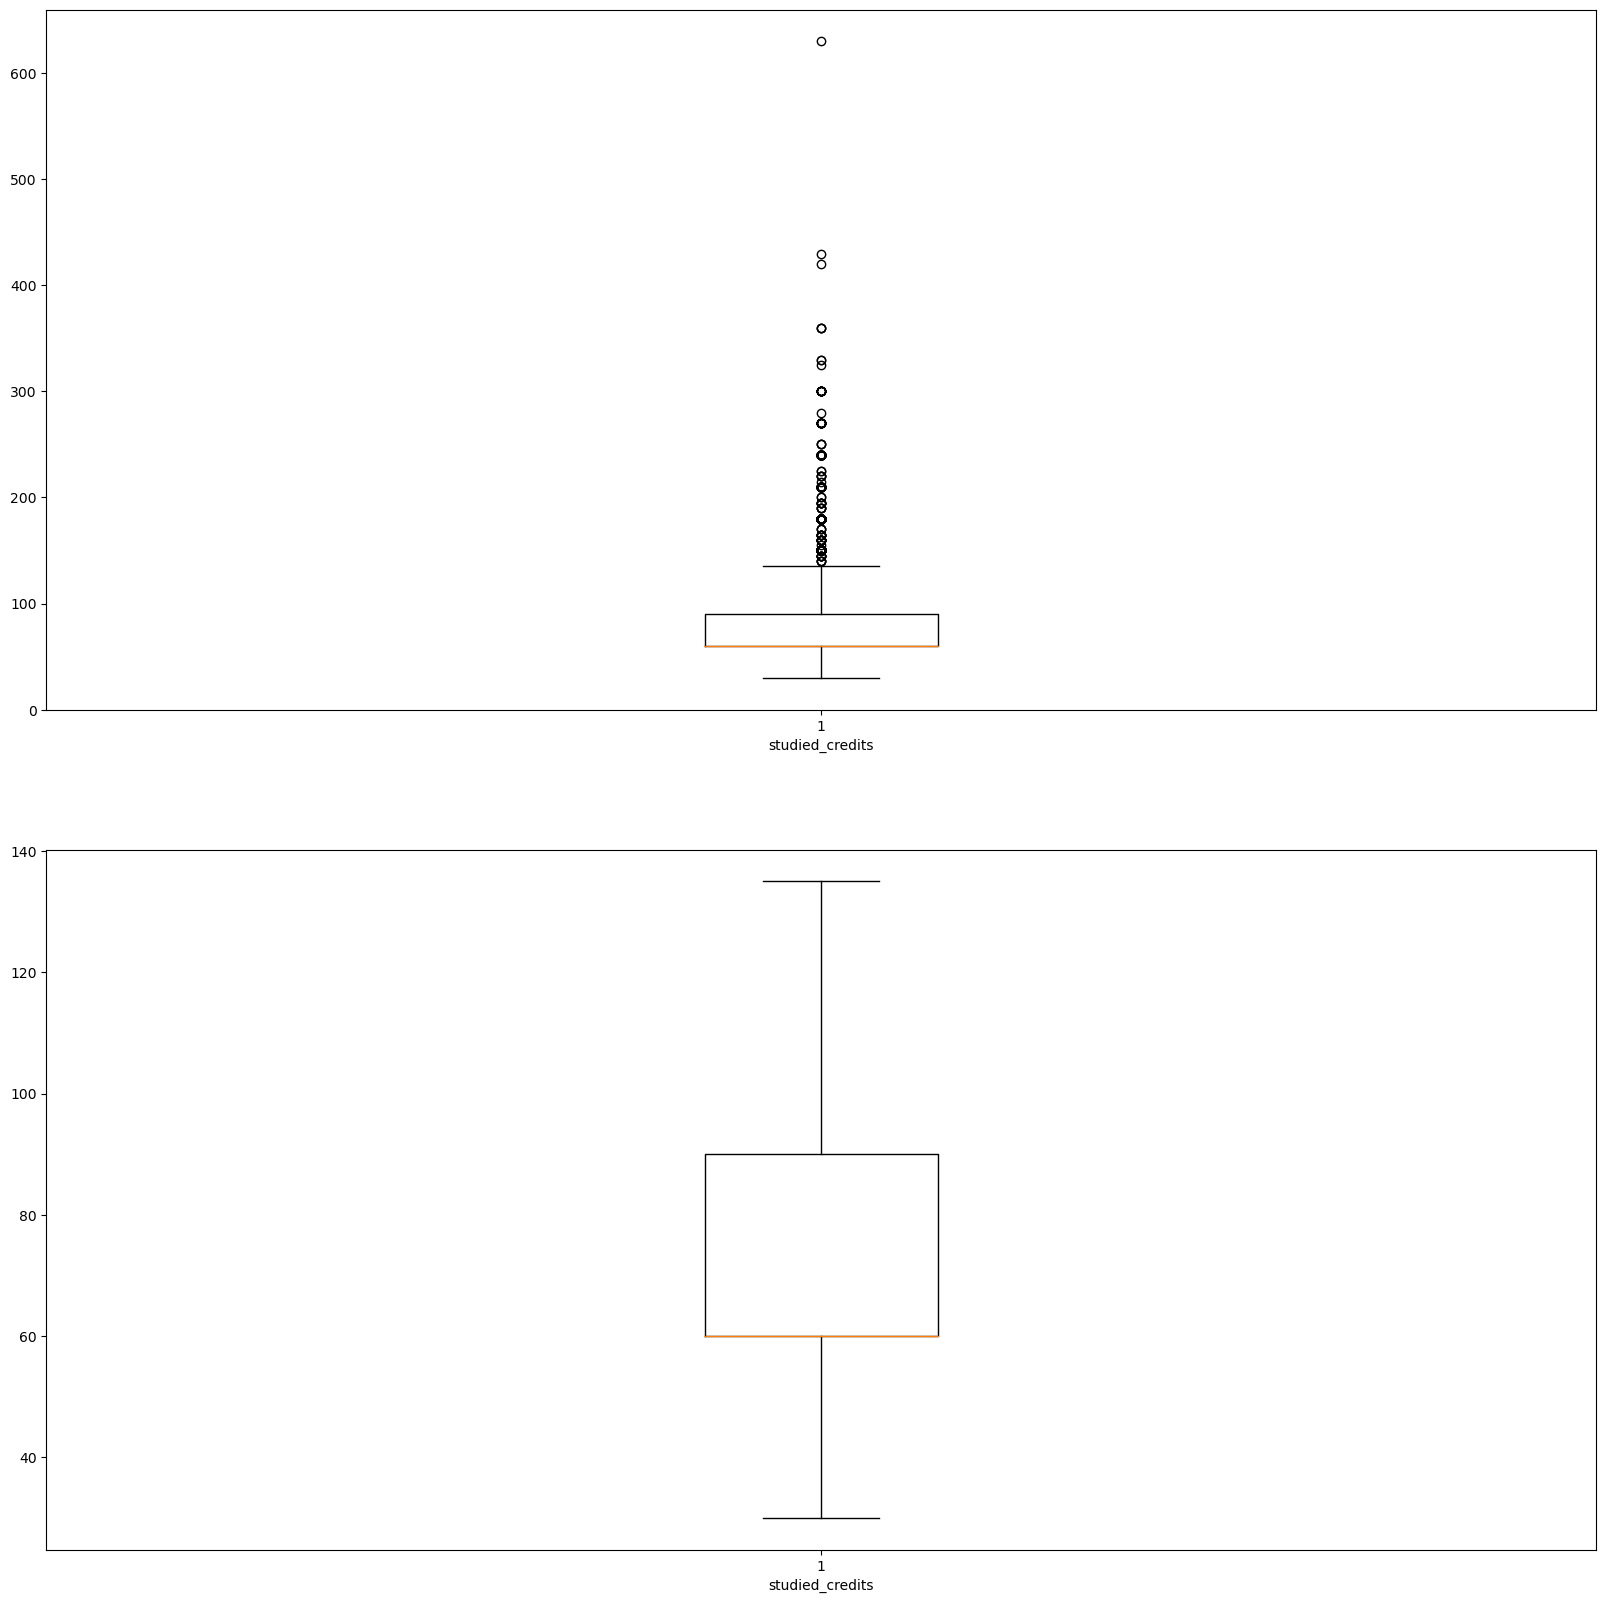

In [31]:
#Visualization of outliers by using box plot (studied_credits)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(20,20))

ax[0].boxplot(merged.studied_credits)
ax[0].set_xlabel('studied_credits')


ax[1].boxplot(merged.studied_credits, showfliers=False)
ax[1].set_xlabel('studied_credits')

#Postoje outlier-i u značajki studied_credits ali neću ništa raditi s njima jer mislim da ta značajka nije ključna za daljnu analizu

In [32]:
#Pretvaranje ne-numeričkih varijabli u numeričke za gender,disability,final_result
encoder = OneHotEncoder(handle_unknown="ignore", drop='first')
encoder.fit(merged[['gender', 'disability','final_result']])
encoded_data = encoder.transform(merged[['gender', 'disability','final_result']])

feature_names = encoder.get_feature_names_out(['gender', 'disability','final_result'])
encoded_data = pd.DataFrame(encoded_data.toarray(), columns=feature_names)

merged.reset_index(drop=True, inplace=True) 
encoded_data.reset_index(drop=True, inplace=True)

df_combined = pd.concat([merged, encoded_data], axis=1)

df_combined

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,studied_credits,disability,final_result,id_site,date,daily_activity,gender_M,disability_Y,final_result_Pass
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,240,N,Pass,546669,-5,98,1.0,0.0,1.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,60,N,Pass,546652,-10,70,0.0,0.0,1.0
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,60,N,Pass,546672,-10,60,0.0,0.0,1.0
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,60,N,Pass,546681,-10,78,0.0,0.0,1.0
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,60,N,Pass,546879,-10,75,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21184,GGG,2014J,2620947,F,Scotland,A Level or Equivalent,80-90%,0-35,30,Y,Pass,897076,-4,7,0.0,1.0,1.0
21185,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,30,N,Fail,896943,-4,2,0.0,0.0,0.0
21186,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,30,N,Pass,897083,19,36,0.0,0.0,1.0
21187,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,30,Y,Pass,897071,-10,15,0.0,1.0,1.0


<function matplotlib.pyplot.show(close=None, block=None)>

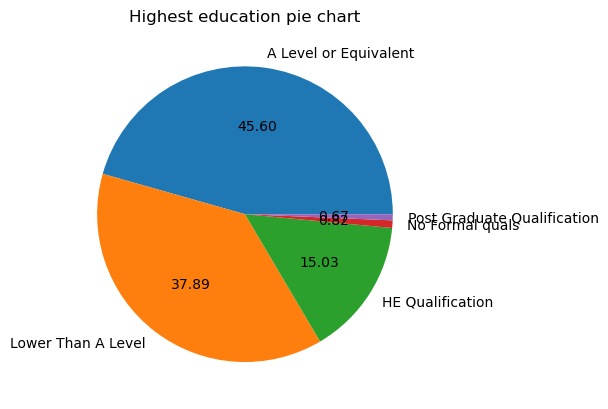

In [33]:
#Pie chart za značajku highest_education
import matplotlib.pyplot as plt
count_per_highest_education =df_combined['highest_education'].value_counts()
percent = (count_per_highest_education/len(df_combined))*100

plt.pie(percent, labels=count_per_highest_education.index, autopct='%.2f' )
plt.title('Highest education pie chart')
plt.show

<ErrorbarContainer object of 3 artists>

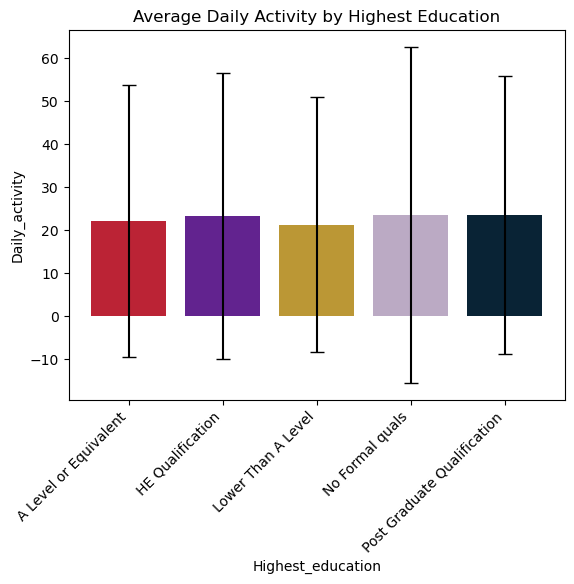

In [34]:
#Bar chart za average Daily Activity prema najvišem stupnju edukacije
average_daily_activity=df_combined.groupby('highest_education')['daily_activity'].mean()
plt.bar(average_daily_activity.index,average_daily_activity)

plt.xlabel('Highest_education')
plt.ylabel('Daily_activity')
plt.title('Average Daily Activity by Highest Education')
plt.xticks(rotation=45, ha='right')

colors = [ 'red', 'purple', 'orange', 'pink','black']
plt.bar(average_daily_activity.index,average_daily_activity, color=colors, alpha=0.7)

#standardna devijacija 
std_dev=df_combined.groupby('highest_education')['daily_activity'].std()
plt.errorbar(average_daily_activity.index,average_daily_activity, yerr=std_dev, ecolor='black', fmt='none', capsize=5)

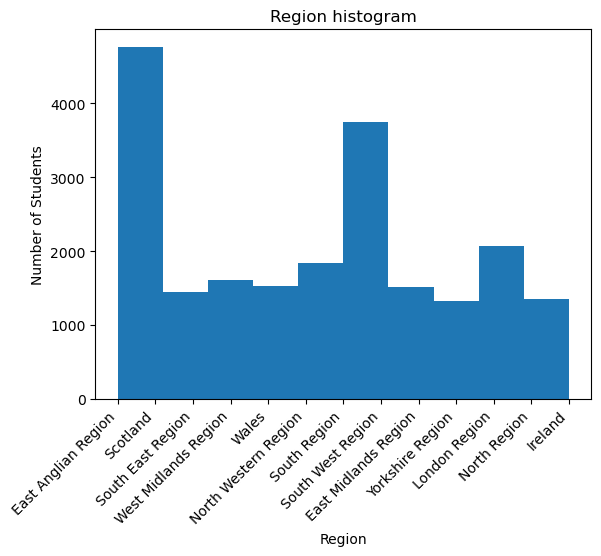

In [35]:
#Histogram za značajku region
plt.hist(df_combined.region)
plt.ylabel('Number of Students')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.title('Region histogram')
plt.show()

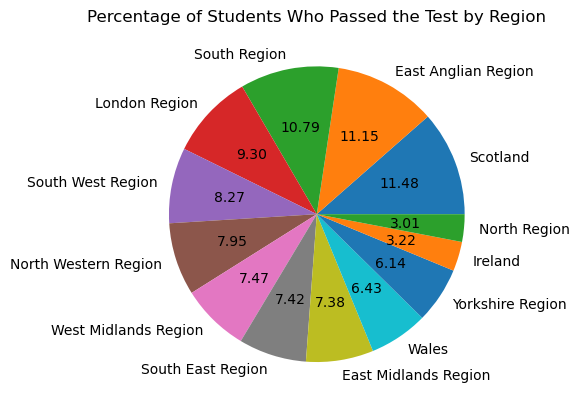

In [36]:
import matplotlib.pyplot as plt


passed_df = df_combined[df_combined['final_result_Pass'] == 1]

pass_counts = passed_df['region'].value_counts()
regions = pass_counts.index
counts = pass_counts.values

total_students = len(df_combined['region'])  

percent = counts / total_students * 100

plt.pie(percent, labels=regions, autopct='%.2f')
plt.title('Percentage of Students Who Passed the Test by Region')
plt.show()


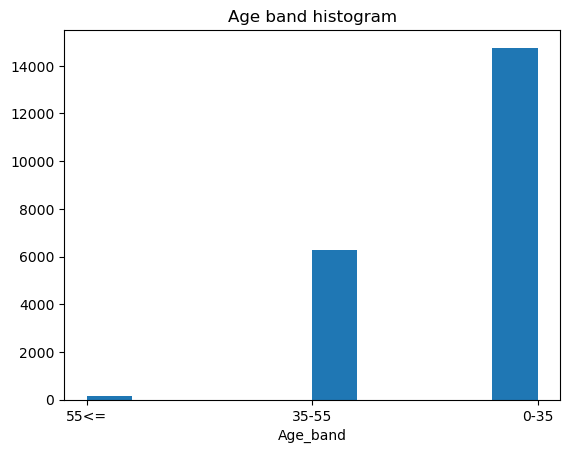

In [37]:
#A histogram of values for Age_band
plt.hist(df_combined.age_band)
plt.xlabel('Age_band')
plt.title('Age band histogram')
plt.show()

Text(0, 0.5, 'Number of students')

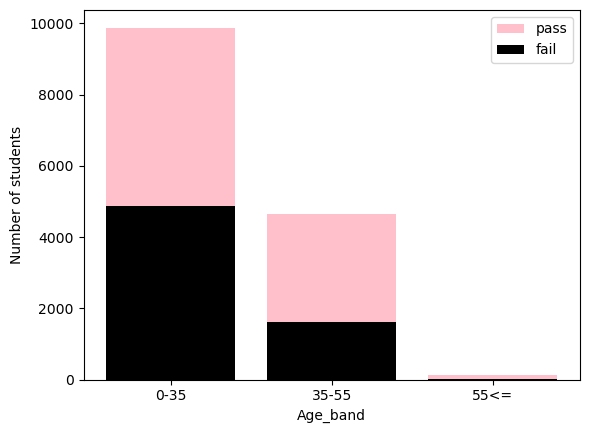

In [38]:
#Bar chart u kojem je prikazan broj studenata koji su prošli(roza) i onih koji su pali(crna) s obzirom na Age_band
mask=df_combined['final_result_Pass']== 1
count_per_pass=df_combined.loc[mask,:].groupby('age_band').count().loc[:,'gender'].values
count_per_fail=df_combined.loc[~mask,:].groupby('age_band').count().loc[:,'gender'].values

Age=df_combined.groupby('age_band').count().index.values

plt.bar(Age, count_per_pass,color='pink', label='pass')
plt.bar(Age,count_per_fail, color='black', label='fail')

plt.legend(loc='best')

plt.xlabel('Age_band')
plt.ylabel('Number of students')


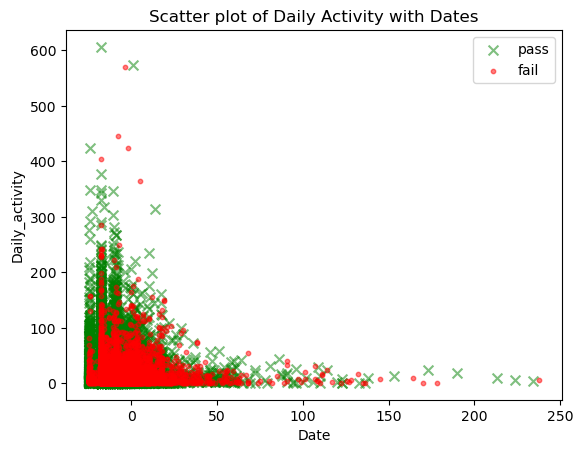

In [39]:
#Scatter plot na kojem je prikazana ovisnost daily_activity o rastućem datumu (x predstavlja one koju su prošli ispit, a kružić one koji nisu)
mask=df_combined['final_result_Pass']== 1

plt.scatter(df_combined.loc[mask,'date'],df_combined.loc[mask,'daily_activity'],s=50,alpha=0.5,c='g', marker='x',label='pass')
plt.scatter(df_combined.loc[~mask,'date'],df_combined.loc[~mask,'daily_activity'],s=10,alpha=0.5,c='r',label='fail')
plt.xlabel('Date')
plt.ylabel('Daily_activity')
plt.title('Scatter plot of Daily Activity with Dates')
plt.legend()
plt.show()


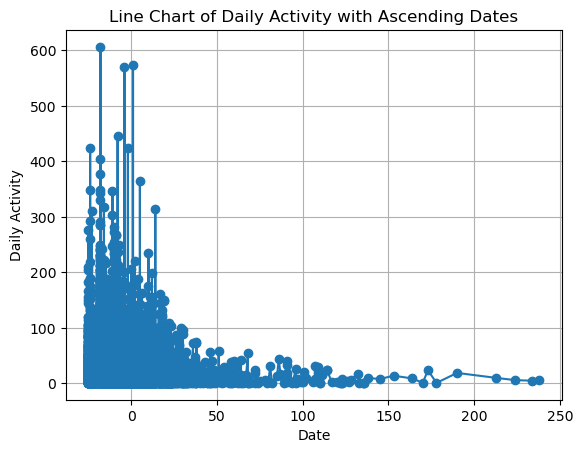

In [40]:
#Line chart
df_combined = df_combined.sort_values('date')

# Plotting the line chart
plt.plot(df_combined['date'], df_combined['daily_activity'], marker='o')
plt.xlabel('Date')
plt.ylabel('Daily Activity')
plt.title('Line Chart of Daily Activity with Ascending Dates')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Number of students')

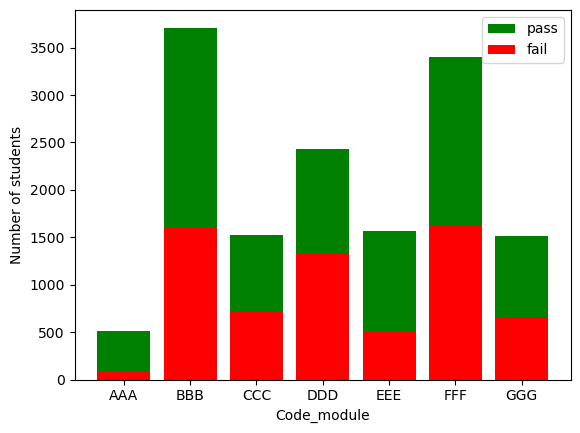

In [41]:
#Bar chart u kojem je prikazan broj studenata koji su prošli(zeleno) i onih koji su pali(crveno) u određenom code_module
mask=df_combined['final_result_Pass']== 1
count_per_pass=df_combined.loc[mask,:].groupby('code_module').count().loc[:,'gender'].values
count_per_fail=df_combined.loc[~mask,:].groupby('code_module').count().loc[:,'gender'].values

Code_module=df_combined.groupby('code_module').count().index.values

plt.bar(Code_module, count_per_pass,color='green', label='pass')
plt.bar(Code_module,count_per_fail, color='red', label='fail')

plt.legend(loc='best')

plt.xlabel('Code_module')
plt.ylabel('Number of students')